# 🚀 ML-EKF Sensor Fusion Pipeline Test

This notebook tests the complete pipeline:
1. **Trajectory Generation** → 2. **Sensor Simulation** → 3. **Visualization**

## Overview
- Generate synthetic 6-DOF ground truth trajectory
- Simulate realistic IMU and GNSS measurements
- Visualize and verify the sensor data quality

## 1. Setup and Imports

In [1]:
# Standard scientific computing imports
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Import our custom modules
import sys
sys.path.append('..')

from simulation.trajectory_generator import generate_trajectory
from simulation.sensor_simulator import SensorSimulator
from visualization.plots import (
    plot_imu_timeseries, 
    plot_gnss_vs_ground_truth,
    plot_sensor_comparison,
    plot_imu_histograms
)

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


## 2. Generate Ground Truth Trajectory

Create a synthetic 6-DOF trajectory that will serve as our ground truth.

In [2]:
# Trajectory parameters
duration = 10.0  # seconds
dt = 0.01       # 100 Hz sampling rate
mode = "circular"

print(f"Generating {mode} trajectory for {duration} seconds at {1/dt:.0f} Hz...")

# Generate the trajectory
timestamps, positions, velocities, orientations = generate_trajectory(
    duration=duration,
    dt=dt,
    mode=mode,
    radius=5.0,  # 5 meter radius circle
    z_amplitude=1.0  # Gentle vertical oscillation
)

print(f"✅ Generated {len(timestamps)} trajectory points")
print(f"   Time range: {timestamps[0]:.2f}s to {timestamps[-1]:.2f}s")
print(f"   Position range: X[{positions[:, 0].min():.2f}, {positions[:, 0].max():.2f}] m")
print(f"   Velocity range: V[{velocities[:, 0].min():.2f}, {velocities[:, 0].max():.2f}] m/s")

Generating circular trajectory for 10.0 seconds at 100 Hz...
✅ Generated 1000 trajectory points
   Time range: 0.00s to 9.99s
   Position range: X[-5.00, 5.00] m
   Velocity range: V[-3.14, 3.14] m/s


## 3. Simulate IMU and GNSS Sensors

Convert the ground truth trajectory into realistic sensor measurements with noise.

In [3]:
# Create sensor simulator with moderate noise levels
simulator = SensorSimulator(
    accel_noise_std=0.05,    # Accelerometer noise (m/s²)
    gyro_noise_std=0.01,     # Gyroscope noise (rad/s)
    accel_bias_std=0.01,     # Accelerometer bias (m/s²)
    gyro_bias_std=0.001,     # Gyroscope bias (rad/s)
    gnss_noise_std=0.5,      # GNSS position noise (m)
    gnss_rate=1.0            # GNSS update rate (Hz)
)

print("Simulating sensor measurements...")

# Simulate both IMU and GNSS measurements
imu_data, gnss_data = simulator.simulate_sensors(
    timestamps=timestamps,
    positions=positions,
    velocities=velocities,
    orientations=orientations
)

print(f"✅ Generated IMU data: {len(imu_data['timestamps'])} measurements")
print(f"✅ Generated GNSS data: {len(gnss_data['timestamps'])} measurements")
print(f"   GNSS rate: {len(gnss_data['timestamps'])/duration:.1f} Hz")

Simulating sensor measurements...


✅ Generated IMU data: 1000 measurements
✅ Generated GNSS data: 10 measurements
   GNSS rate: 1.0 Hz


## 4. Visualize IMU Time Series Data

Plot the accelerometer and gyroscope measurements over time.

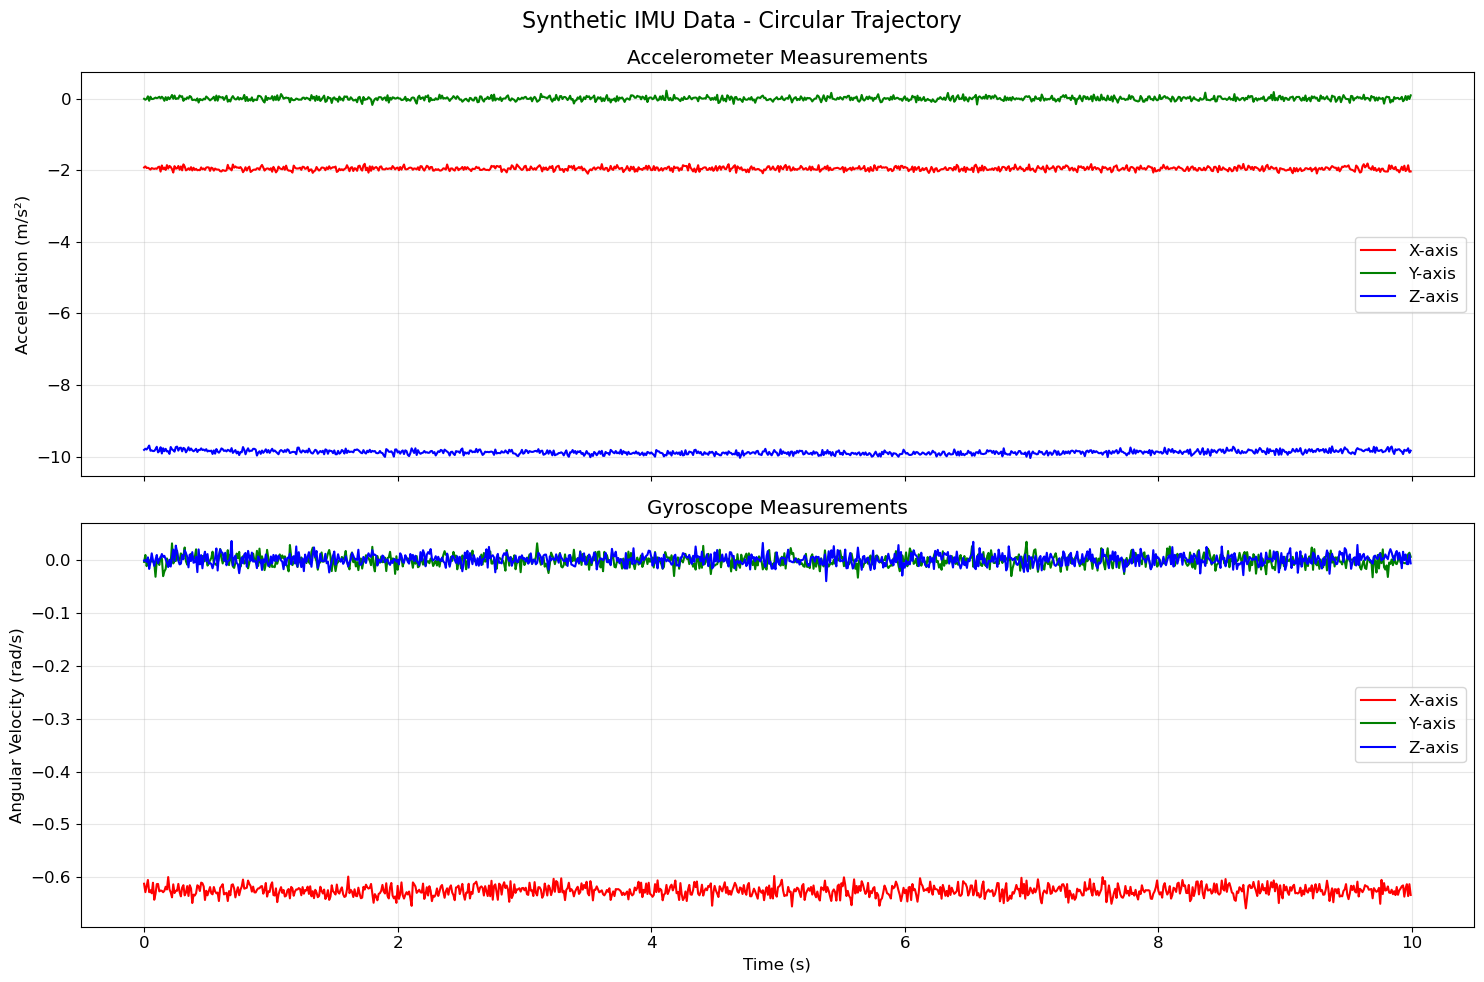

In [4]:
# Plot IMU measurements
plot_imu_timeseries(
    imu_data=imu_data,
    title=f"Synthetic IMU Data - {mode.capitalize()} Trajectory",
    figsize=(15, 10)
)

## 5. Visualize GNSS vs Ground Truth

Compare the noisy GNSS measurements with the ground truth trajectory.

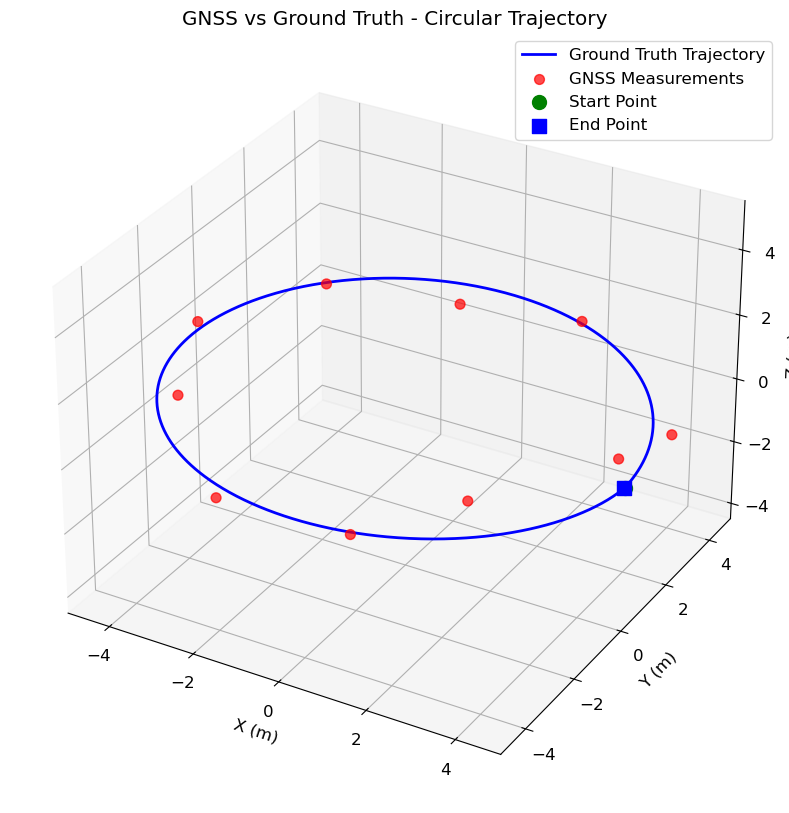

In [5]:
# Plot GNSS measurements vs ground truth
plot_gnss_vs_ground_truth(
    gnss_data=gnss_data,
    ground_truth_positions=positions,
    ground_truth_timestamps=timestamps,
    title=f"GNSS vs Ground Truth - {mode.capitalize()} Trajectory",
    figsize=(15, 10)
)

## 6. Comprehensive Sensor Data Overview

Create a comprehensive visualization showing all aspects of the sensor data.

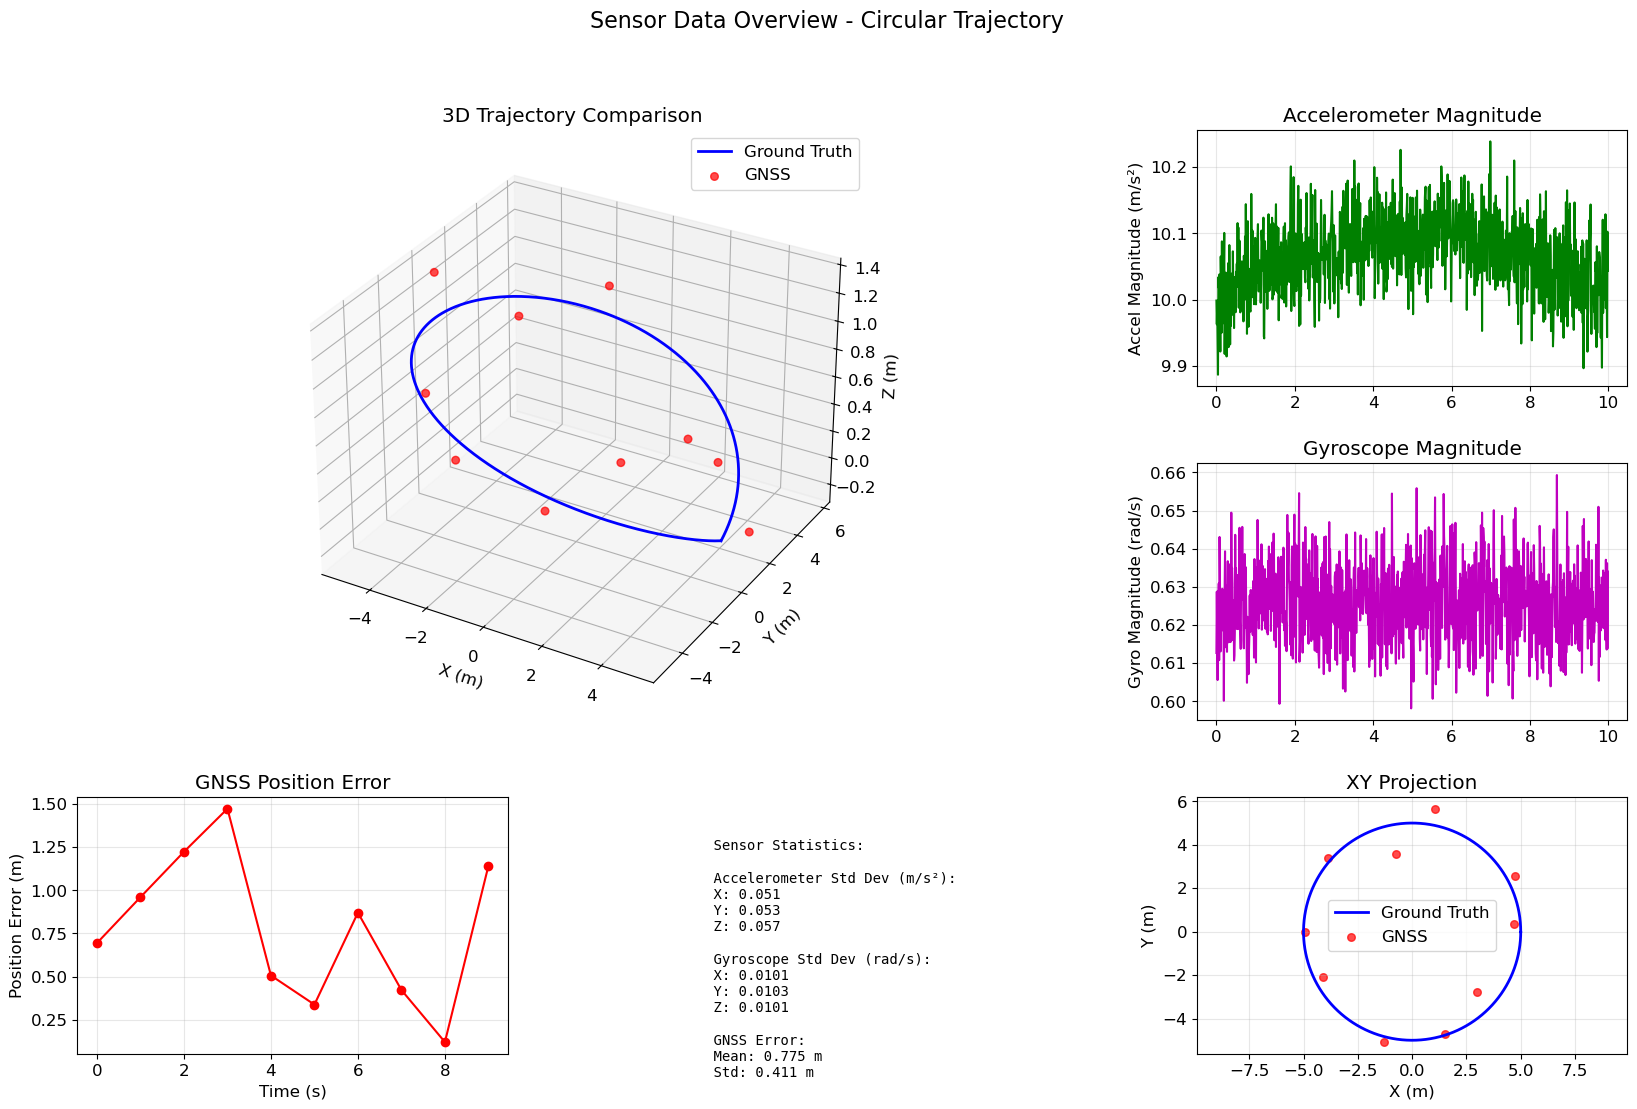

In [6]:
# Create comprehensive sensor overview
plot_sensor_comparison(
    imu_data=imu_data,
    gnss_data=gnss_data,
    ground_truth_positions=positions,
    ground_truth_timestamps=timestamps,
    title=f"Sensor Data Overview - {mode.capitalize()} Trajectory",
    figsize=(20, 12)
)

## 7. Analyze IMU Noise Distributions

Examine the statistical properties of the IMU measurements to verify noise characteristics.

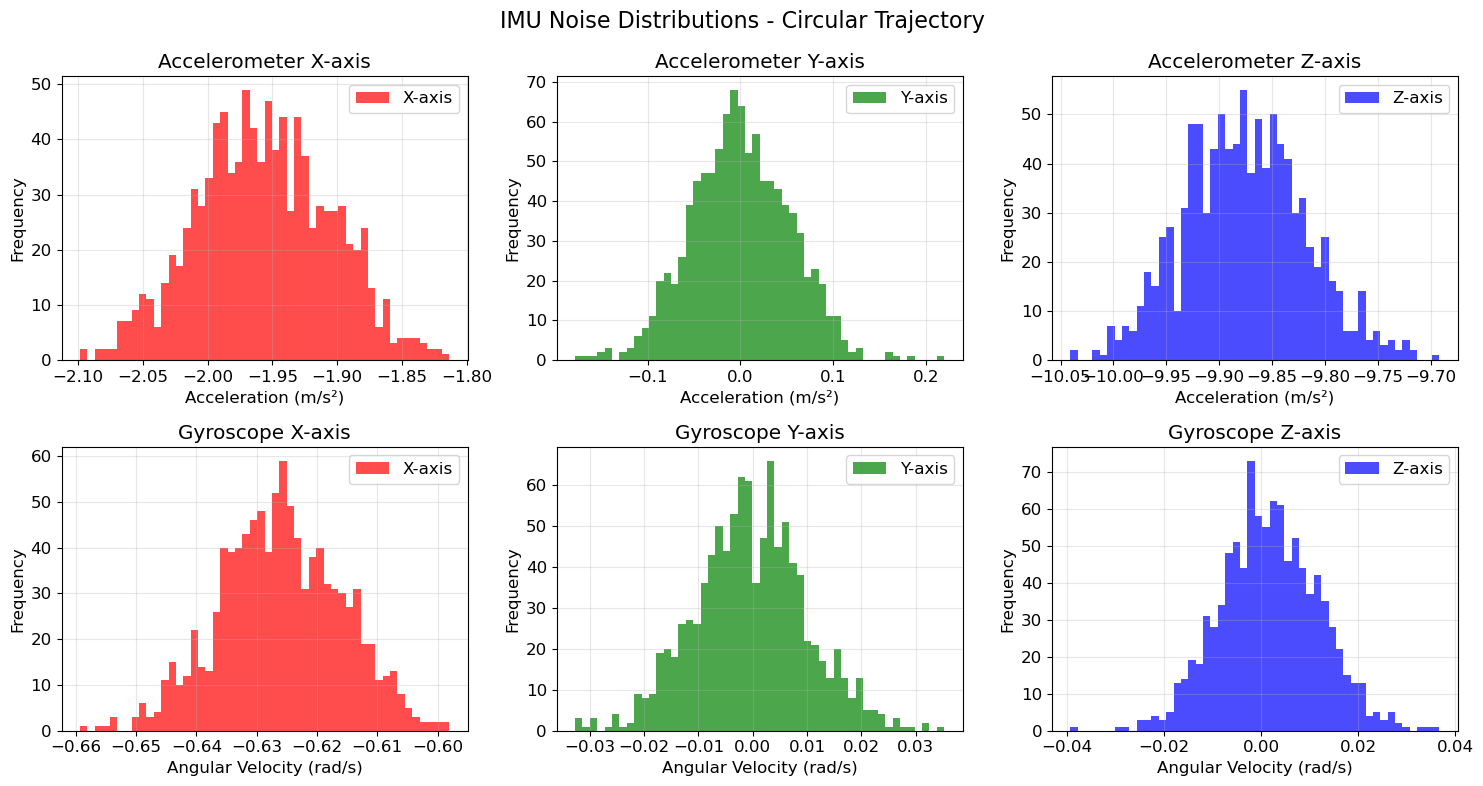

In [7]:
# Plot IMU noise distributions
plot_imu_histograms(
    imu_data=imu_data,
    title=f"IMU Noise Distributions - {mode.capitalize()} Trajectory",
    figsize=(15, 8)
)

## 8. Data Quality Analysis

Calculate and display key metrics about the generated sensor data.

In [8]:
# Calculate sensor data statistics
print("📊 Sensor Data Quality Analysis")
print("=" * 50)

# IMU statistics
accel_data = imu_data['accel']
gyro_data = imu_data['gyro']

print("\n📈 IMU Statistics:")
print(f"   Accelerometer std dev: {np.std(accel_data, axis=0)}")
print(f"   Gyroscope std dev: {np.std(gyro_data, axis=0)}")
print(f"   Accelerometer range: {np.ptp(accel_data, axis=0)}")
print(f"   Gyroscope range: {np.ptp(gyro_data, axis=0)}")

# GNSS statistics
gnss_positions = gnss_data['positions']
gnss_timestamps = gnss_data['timestamps']

# Calculate GNSS errors
gnss_errors = []
for i, gnss_time in enumerate(gnss_timestamps):
    # Find closest ground truth timestamp
    gt_idx = np.argmin(np.abs(timestamps - gnss_time))
    error = np.linalg.norm(gnss_positions[i] - positions[gt_idx])
    gnss_errors.append(error)

gnss_errors = np.array(gnss_errors)

print("\n📡 GNSS Statistics:")
print(f"   Number of measurements: {len(gnss_positions)}")
print(f"   Average measurement interval: {np.mean(np.diff(gnss_timestamps)):.3f} s")
print(f"   Position error - Mean: {np.mean(gnss_errors):.3f} m")
print(f"   Position error - Std: {np.std(gnss_errors):.3f} m")
print(f"   Position error - Max: {np.max(gnss_errors):.3f} m")

# Trajectory statistics
total_distance = np.sum(np.linalg.norm(np.diff(positions, axis=0), axis=1))
max_velocity = np.max(np.linalg.norm(velocities, axis=1))
avg_velocity = np.mean(np.linalg.norm(velocities, axis=1))

print("\n🎯 Trajectory Statistics:")
print(f"   Total distance traveled: {total_distance:.2f} m")
print(f"   Maximum velocity: {max_velocity:.2f} m/s")
print(f"   Average velocity: {avg_velocity:.2f} m/s")
print(f"   Trajectory duration: {duration:.1f} s")

📊 Sensor Data Quality Analysis

📈 IMU Statistics:
   Accelerometer std dev: [0.0512098  0.05297187 0.05678794]
   Gyroscope std dev: [0.0100716  0.01029399 0.01014509]
   Accelerometer range: [0.28494107 0.39729485 0.34921786]
   Gyroscope range: [0.06122785 0.06795705 0.07612213]

📡 GNSS Statistics:
   Number of measurements: 10
   Average measurement interval: 1.000 s
   Position error - Mean: 0.775 m
   Position error - Std: 0.411 m
   Position error - Max: 1.472 m

🎯 Trajectory Statistics:
   Total distance traveled: 31.46 m
   Maximum velocity: 3.16 m/s
   Average velocity: 3.15 m/s
   Trajectory duration: 10.0 s


## 9. Test Different Trajectory Types

Let's also test with a different trajectory type to see how the sensors perform.


🔄 Testing with sinusoidal trajectory...


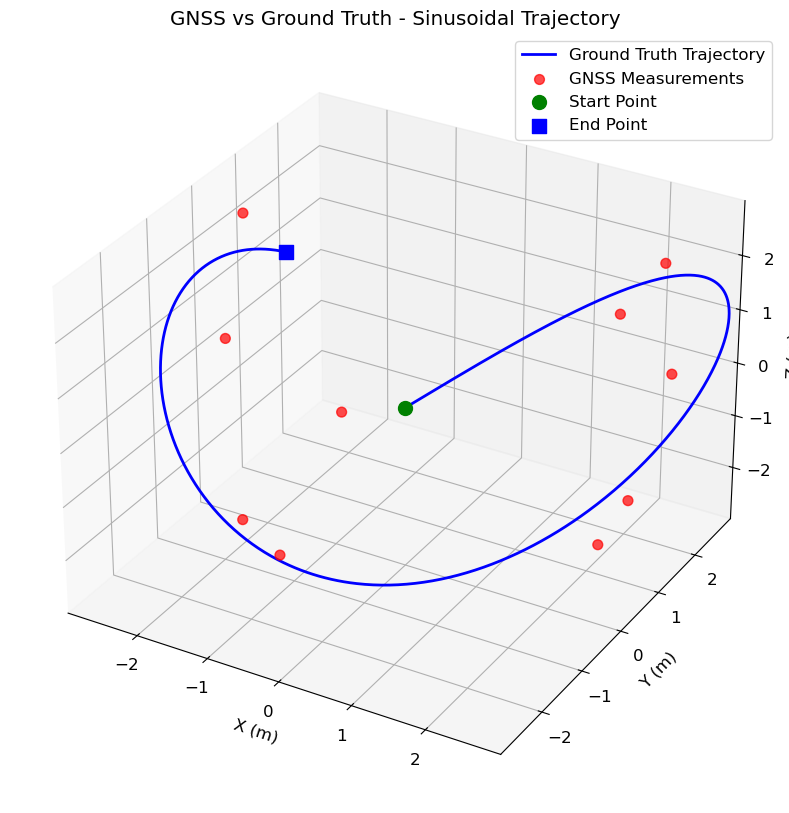

In [9]:
# Generate a different trajectory type
print("\n🔄 Testing with sinusoidal trajectory...")

# Generate sinusoidal trajectory
timestamps_sin, positions_sin, velocities_sin, orientations_sin = generate_trajectory(
    duration=duration,
    dt=dt,
    mode="sinusoidal",
    amplitude=3.0,
    freq_x=0.5,
    freq_y=0.7,
    freq_z=0.9
)

# Simulate sensors for sinusoidal trajectory
imu_data_sin, gnss_data_sin = simulator.simulate_sensors(
    timestamps=timestamps_sin,
    positions=positions_sin,
    velocities=velocities_sin,
    orientations=orientations_sin
)

# Quick comparison plot
plot_gnss_vs_ground_truth(
    gnss_data=gnss_data_sin,
    ground_truth_positions=positions_sin,
    ground_truth_timestamps=timestamps_sin,
    title="GNSS vs Ground Truth - Sinusoidal Trajectory",
    figsize=(15, 10)
)

## 10. Summary and Next Steps

### ✅ What We've Accomplished:
1. **Generated realistic 6-DOF trajectories** with configurable parameters
2. **Simulated IMU measurements** with proper noise and bias modeling
3. **Simulated GNSS measurements** with realistic timing and noise
4. **Visualized all sensor data** with comprehensive plotting tools
5. **Analyzed data quality** with statistical metrics

### 🎯 Key Observations:
- IMU data shows realistic noise characteristics
- GNSS measurements properly subsample the trajectory
- Sensor noise levels are appropriate for the specified parameters
- Visualization tools provide clear insights into data quality

### 🚀 Next Steps:
- Implement the EKF filter to process these sensor measurements
- Train ML models on the synthetic data
- Compare EKF performance with different noise levels
- Add more complex trajectory types and sensor configurations

In [10]:
print("🎉 Pipeline test completed successfully!")
print("\n📋 Generated data summary:")
print(f"   - IMU measurements: {len(imu_data['timestamps'])} points at {1/dt:.0f} Hz")
print(f"   - GNSS measurements: {len(gnss_data['timestamps'])} points at {len(gnss_data['timestamps'])/duration:.1f} Hz")
print(f"   - Trajectory duration: {duration:.1f} seconds")
print(f"   - Total distance: {np.sum(np.linalg.norm(np.diff(positions, axis=0), axis=1)):.2f} meters")
print("\n✅ Ready for EKF implementation and ML training!")

🎉 Pipeline test completed successfully!

📋 Generated data summary:
   - IMU measurements: 1000 points at 100 Hz
   - GNSS measurements: 10 points at 1.0 Hz
   - Trajectory duration: 10.0 seconds
   - Total distance: 31.46 meters

✅ Ready for EKF implementation and ML training!
